<a href="https://colab.research.google.com/github/Veranzi/data-manipulation/blob/main/UdemySentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import collections

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
import xgboost as xg



In [ ]:
from scipy import stats
from scipy.stats import boxcox

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

In [ ]:
from wordcloud import WordCloud
from joblib import dump, load

In [ ]:
import time
import string
import re


In [ ]:
import warnings
warnings.filterwarnings('ignore')

importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Tweets16000000.csv')


In [ ]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


knowing the data

In [ ]:
data.columns = ["sentiment","time","date","querry","username","text"]
data.head

<bound method NDFrame.head of          sentiment        time                          date    querry  \
0                0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1                0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2                0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3                0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4                0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...            ...         ...                           ...       ...   
1599994          4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995          4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996          4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997          4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998          4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                username                                               text  
0  

In [ ]:
data.shape

(1599999, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   time       1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   querry     1599999 non-null  object
 4   username   1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
data.isnull().sum()

sentiment    0
time         0
date         0
querry       0
username     0
text         0
dtype: int64

In [ ]:
data['sentiment'].value_counts()

4    800000
0    799999
Name: sentiment, dtype: int64

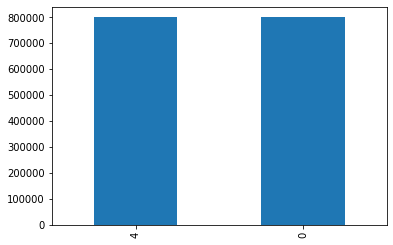

In [ ]:
data['sentiment'].value_counts().plot.bar()

preparing data

In [ ]:
data = data[['text','sentiment']]

In [ ]:
data.head

<bound method NDFrame.head of                                                       text  sentiment
0        is upset that he can't update his Facebook by ...          0
1        @Kenichan I dived many times for the ball. Man...          0
2          my whole body feels itchy and like its on fire           0
3        @nationwideclass no, it's not behaving at all....          0
4                            @Kwesidei not the whole crew           0
...                                                    ...        ...
1599994  Just woke up. Having no school is the best fee...          4
1599995  TheWDB.com - Very cool to hear old Walt interv...          4
1599996  Are you ready for your MoJo Makeover? Ask me f...          4
1599997  Happy 38th Birthday to my boo of alll time!!! ...          4
1599998  happy #charitytuesday @theNSPCC @SparksCharity...          4

[1599999 rows x 2 columns]>

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

In [ ]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
# WORD2VEC 
wordvector_SIZE = 300
wordvector_WINDOW = 7
wordvector_EPOCH = 25
wordvector_MIN_COUNT = 10

In [ ]:
# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 3
BATCH_SIZE = 1024

In [ ]:
# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

In [ ]:
# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.wordvector"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

Dataset details
target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
ids: The id of the tweet ( 2087)
date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
flag: The query (lyx). If there is no query, then this value is NO_QUERY.
user: the user that tweeted (robotickilldozr)
text: the text of the tweet (Lyx is cool)

In [ ]:
print("Dataset size:", len(data))

Dataset size: 1599999


Map target label to String
0 -> NEGATIVE
2 -> NEUTRAL
4 -> POSITIVE

In [ ]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [ ]:
%%time
#target = sentiment
#data.target = data.target.apply(lambda x: decode_sentiment(x))
data.sentiment = data.sentiment.apply(lambda x: decode_sentiment(x))
#data['target'] = data.apply(lambda x: decode_sentiment(x))

CPU times: user 526 ms, sys: 7.9 ms, total: 533 ms
Wall time: 543 ms


In [ ]:

from collections import Counter

#target_cnt = Counter(data.target)

#plt.figure(figsize=(16,8))
#plt.bar(target_cnt.keys(), target_cnt.values())
#plt.title("Dataset labels distribuition")

Pre-Process dataset

In [ ]:
stop_words = stopwords.words("english")
from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer("english")

In [ ]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
data.text = data.text.apply(lambda x: preprocess(x))

Split train and test

In [ ]:
data_train, data_test = train_test_split(data, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(data_train))
print("TEST size:", len(data_test))

TRAIN size: 1279999
TEST size: 320000


Word2Vec

In [ ]:
%%time
documents = [_text.split() for _text in data_train.text] 

CPU times: user 3.58 s, sys: 594 ms, total: 4.17 s
Wall time: 4.16 s


In [ ]:
import gensim
from gensim import models
from gensim.models.wrappers import LdaMallet
wordvector_model = gensim.models.word2vec.Word2Vec(size=wordvector_SIZE, 
                                            window=wordvector_WINDOW, 
                                            min_count=wordvector_MIN_COUNT, 
                                            workers=8)

In [ ]:
wordvector_model.build_vocab(documents)

In [ ]:
words = wordvector_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 30298


In [ ]:
%%time
wordvector_model.train(documents, total_examples=len(documents), epochs=wordvector_EPOCH)

In [ ]:
wordvector_model.most_similar("love")

Tokenize Text

In [ ]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

In [ ]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(data_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(data_test.text), maxlen=SEQUENCE_LENGTH)

Label Encoder

In [ ]:
#labels = data_train[target].unique().tolist()



In [ ]:
labels = data_train.sentiment.unique().tolist()


In [ ]:
labels.append(NEUTRAL)
labels

In [ ]:
encoder = LabelEncoder()
encoder.fit(data_train.sentiment.tolist())

y_train = encoder.transform(data_train.sentiment.tolist())
y_test = encoder.transform(data_test.sentiment.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

In [ ]:
y_train[:10]

Embedding layer

In [ ]:
embedding_matrix = np.zeros((vocab_size, wordvector_SIZE))
for word, i in tokenizer.word_index.items():
  if word in wordvector_model.wv:
    embedding_matrix[i] = wordvector_model.wv[word]
print(embedding_matrix.shape)

In [ ]:
embedding_layer = Embedding(vocab_size, wordvector_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

Building the Model

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Callbacks

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

TRAINING THE MODEL

In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/3
1125/1125 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.7517 

1125/1125 [==============================] - 14756s 13s/step - loss: 0.5019 - accuracy: 0.7517 - val_loss: 0.4666 - val_accuracy: 0.7795 - lr: 0.0010
Epoch 2/3
 687/1125 [=================>............] - ETA: 1:31:44 - loss: 0.4781 - accuracy: 0.7681

Evaluating the model

In [ ]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Prediction on a sentence

In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

In [ ]:
predict("I love the music")

In [ ]:
predict("I hate the rain")

In [ ]:
predict("i don't know what i'm doing")

Using Confusion Matrix

In [ ]:
%%time
y_pred_1d = []
y_test_1d = list(data_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [ ]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=data_train.target.unique(), title="Confusion matrix")
plt.show()

Classification Report

In [ ]:
print(classification_report(y_test_1d, y_pred_1d))

Accuracy Score of the sentiment analysis model

In [ ]:
accuracy_score(y_test_1d, y_pred_1d)

SAVING THE MODEL

In [ ]:
model.save(KERAS_MODEL)
wordvector_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)